In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"Indian Airlines.csv")
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [5]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [6]:
for col in df:
    if df[col].dtype=='object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


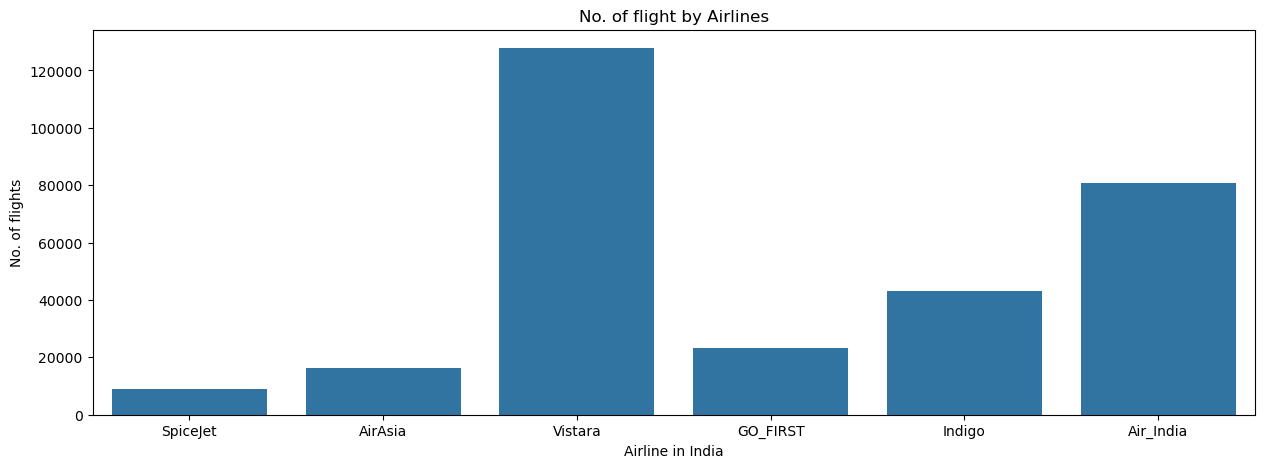

In [8]:
from turtle import title
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline',data=df)
NF.set(xlabel='Airline in India',ylabel='No. of flights', title='No. of flight by Airlines')
plt.show(NF)

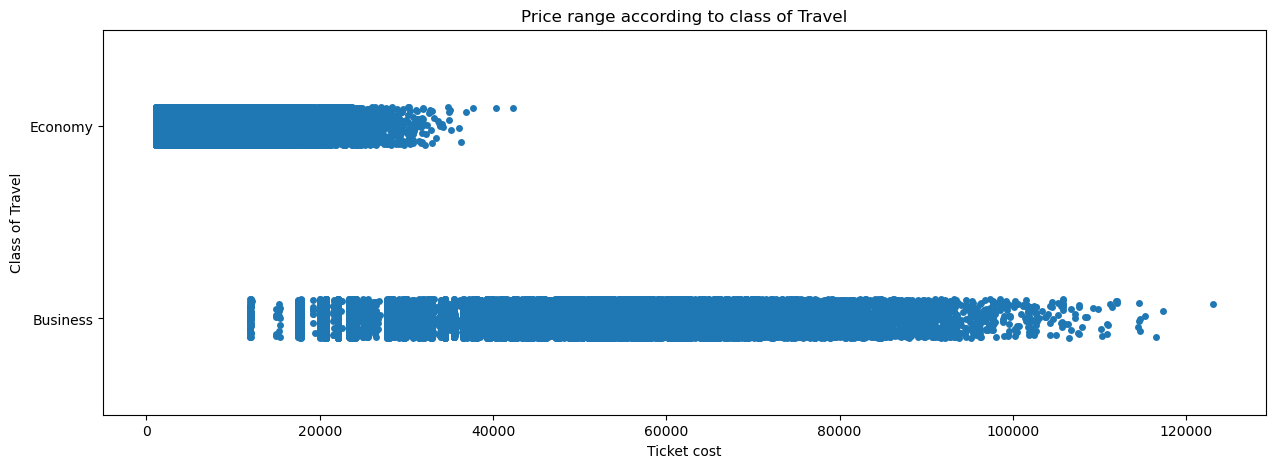

In [9]:
from turtle import title
plt.figure(figsize=(15,5))
CE=sns.stripplot(x='price', y='class', data=df)
CE.set(xlabel='Ticket cost',ylabel='Class of Travel',title='Price range according to class of Travel')
plt.show(CE)

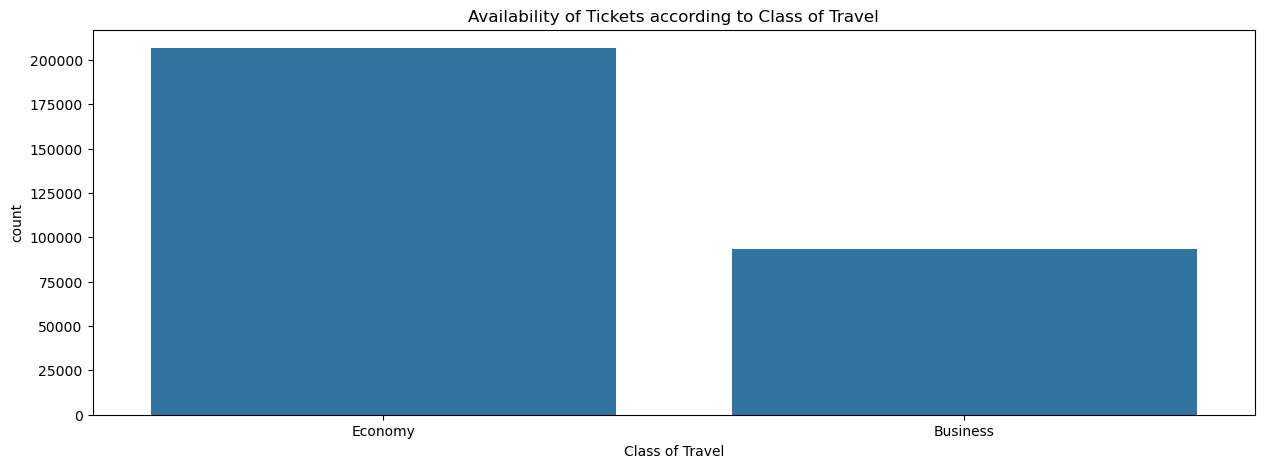

In [10]:
from turtle import title
plt.figure(figsize=(15,5))
TA=sns.countplot(x='class',data=df)
TA.set(xlabel='Class of Travel',title='Availability of Tickets according to Class of Travel')
plt.show(TA)

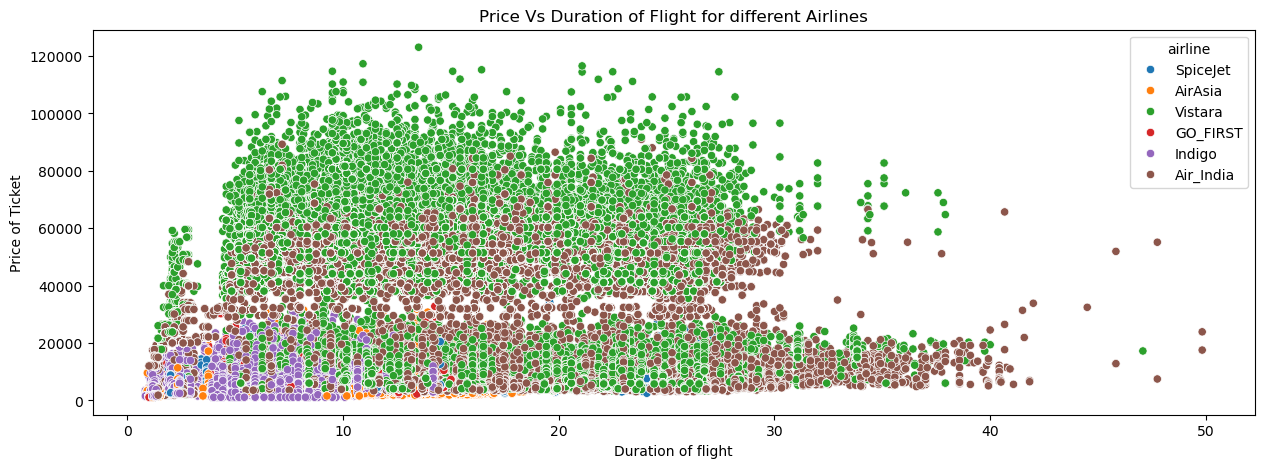

In [15]:
plt.figure(figsize=(15,5))
PD=sns.scatterplot(x=df['duration'],y=df['price'],hue=df['airline'])
PD.set(xlabel='Duration of flight',ylabel='Price of Ticket',title='Price Vs Duration of Flight for different Airlines')
plt.show(PD)

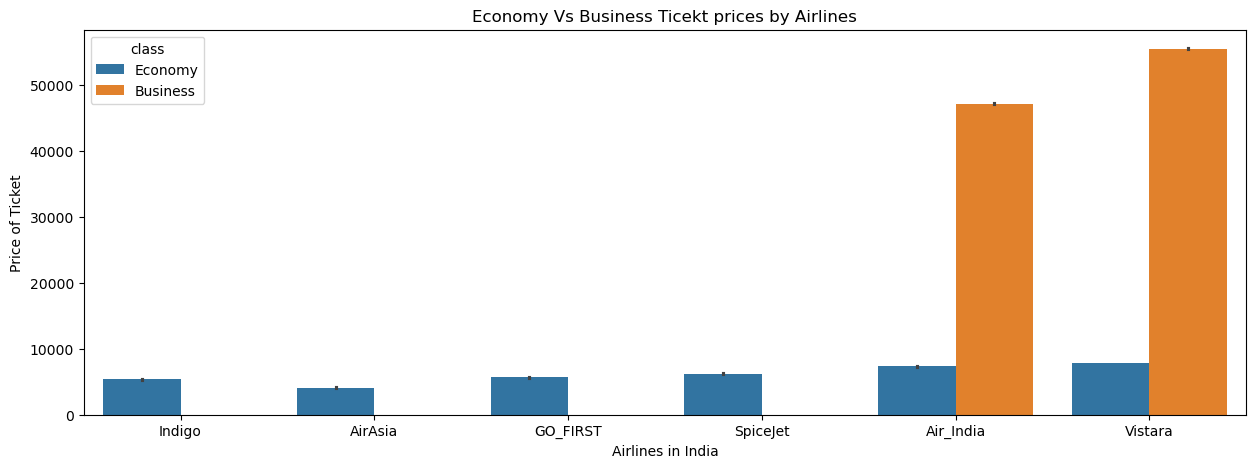

In [16]:
plt.figure(figsize=(15,5))
AS=sns.barplot(x='airline',y='price',hue='class',data=df.sort_values('price'))
AS.set(xlabel='Airlines in India',ylabel='Price of Ticket',title='Economy Vs Business Ticekt prices by Airlines')
plt.show(AS)

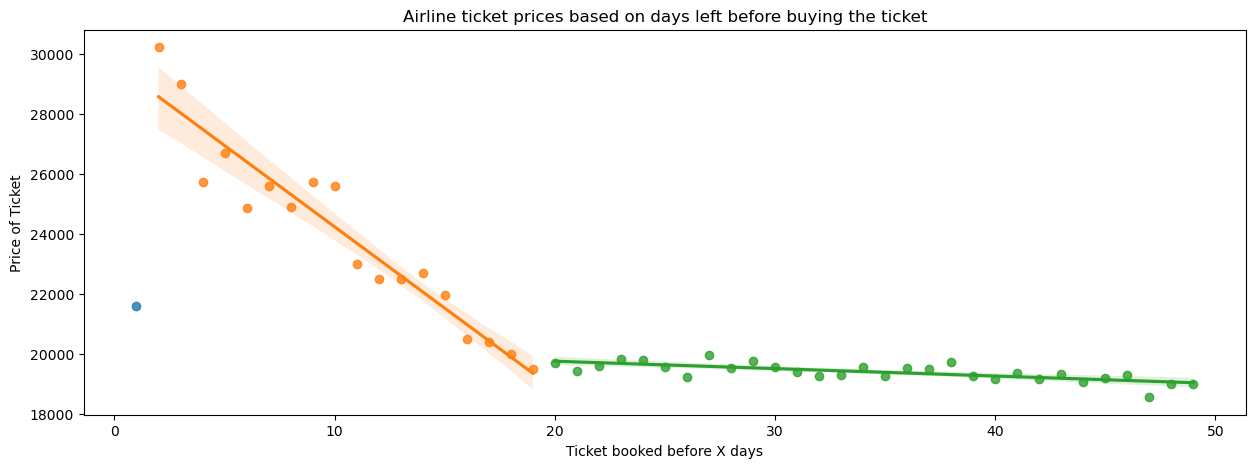

In [17]:
df_temp=df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax=plt.axes()
sns.regplot(x=df_temp.loc[df_temp['days_left']==1].days_left,y=df_temp.loc[df_temp['days_left']==1].price,data=df_temp,fit_reg=False,ax=ax)
sns.regplot(x=df_temp.loc[(df_temp['days_left']>1)&(df_temp['days_left']<20)].days_left,y=df_temp.loc[(df_temp['days_left']>1)&(df_temp['days_left']<20)].price,data=df_temp,fit_reg=True,ax=ax)
sns.regplot(x=df_temp.loc[df_temp['days_left']>=20].days_left,y=df_temp.loc[df_temp['days_left']>=20].price,data=df_temp,fit_reg=True,ax=ax)
ax.set(xlabel='Ticket booked before X days',ylabel='Price of Ticket',title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

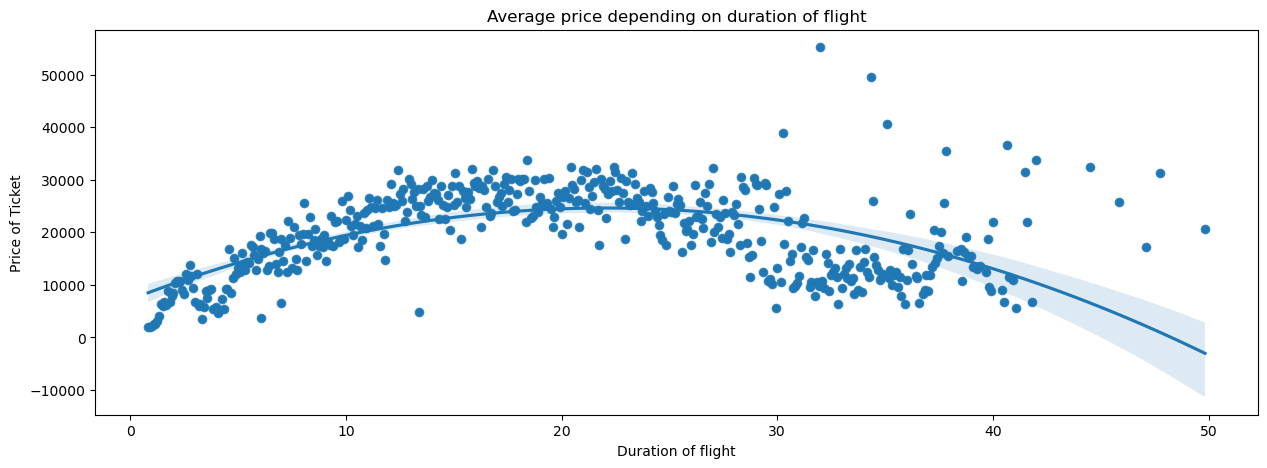

In [19]:
df_temp2=df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD=sns.scatterplot(x='duration',y='price',data=df_temp2)
PD=sns.regplot(x='duration',y='price',data=df_temp2,order=2)
PD.set(xlabel='Duration of flight',ylabel='Price of Ticket',title='Average price depending on duration of flight')
plt.show(PD)

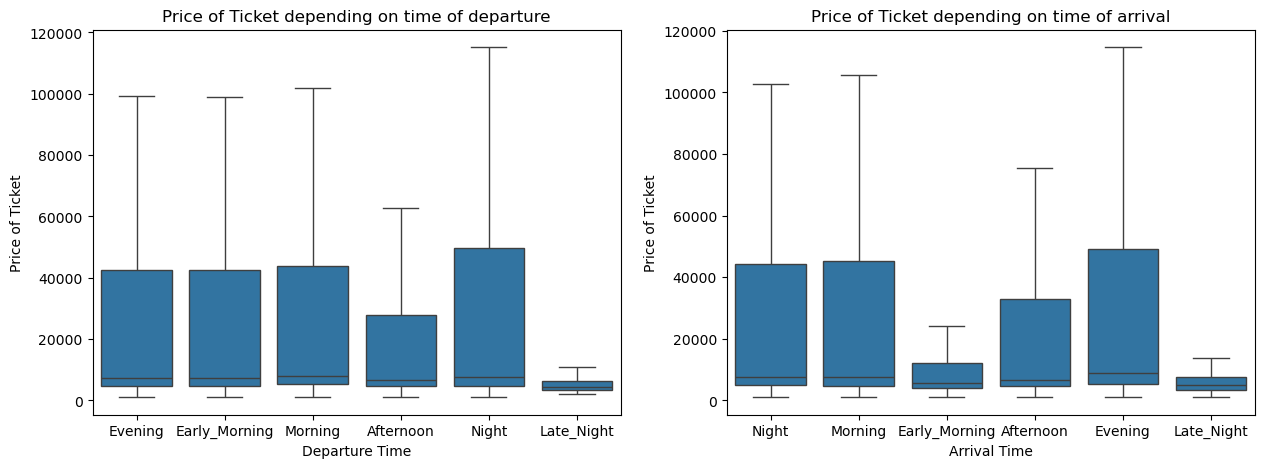

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='departure_time',y='price',showfliers=False).set(xlabel='Departure Time',ylabel='Price of Ticket',title='Price of Ticket depending on time of departure')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='arrival_time',y='price',showfliers=False).set(xlabel='Arrival Time',ylabel='Price of Ticket',title='Price of Ticket depending on time of arrival')
plt.show()

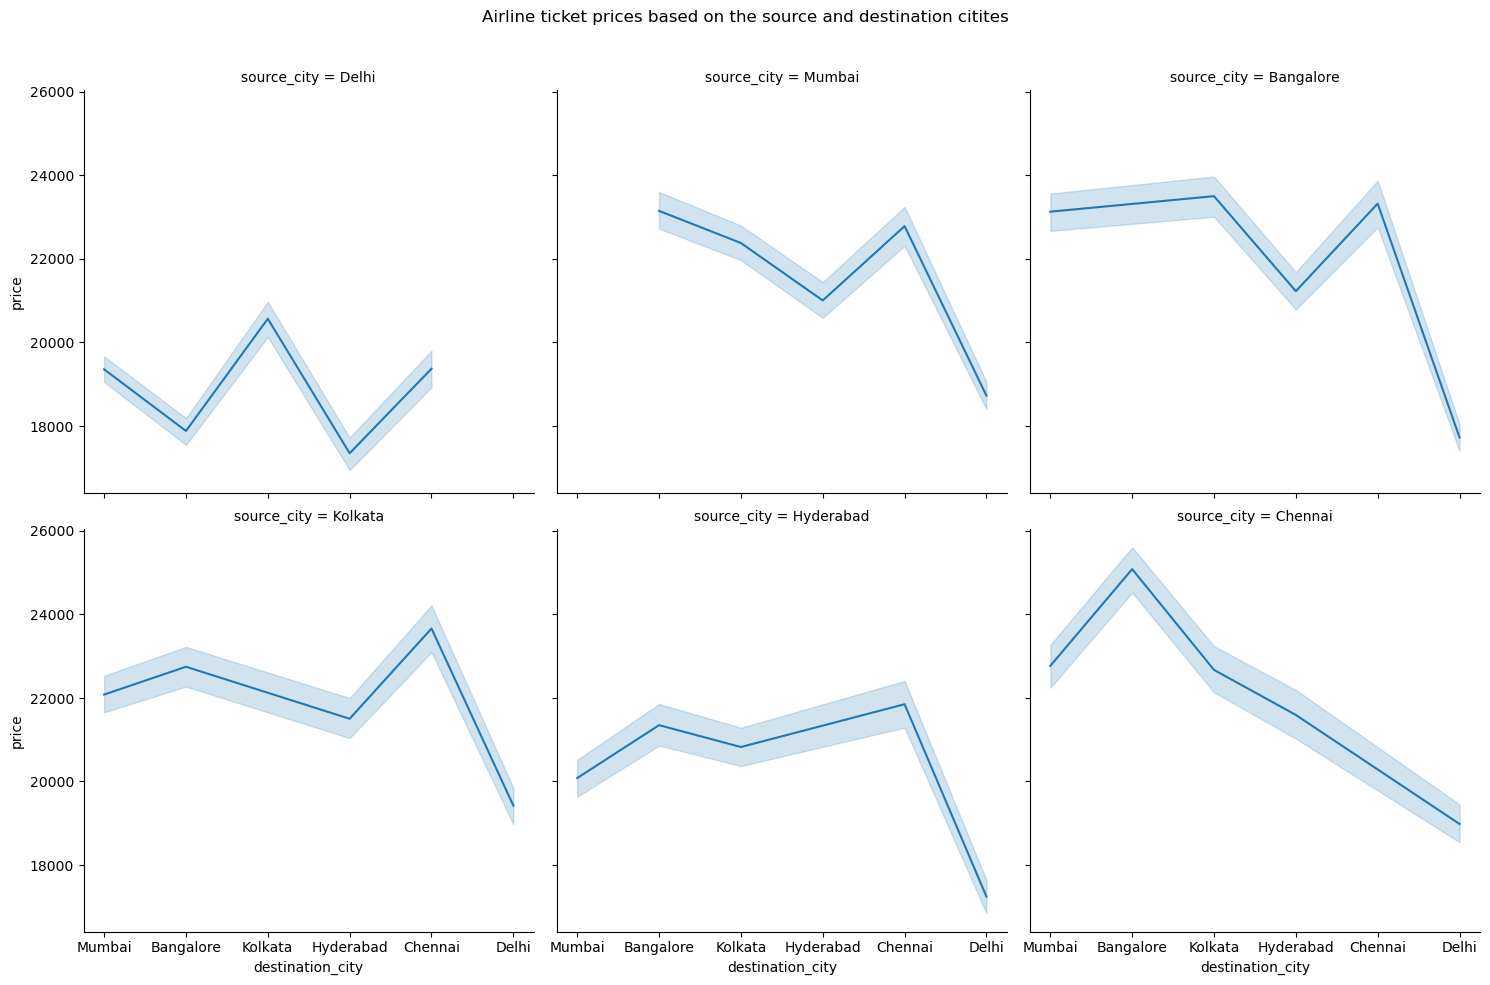

In [22]:
ax=sns.relplot(x='destination_city',y='price',col='source_city',col_wrap=3,kind='line',data=df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination citites')
plt.show(ax)

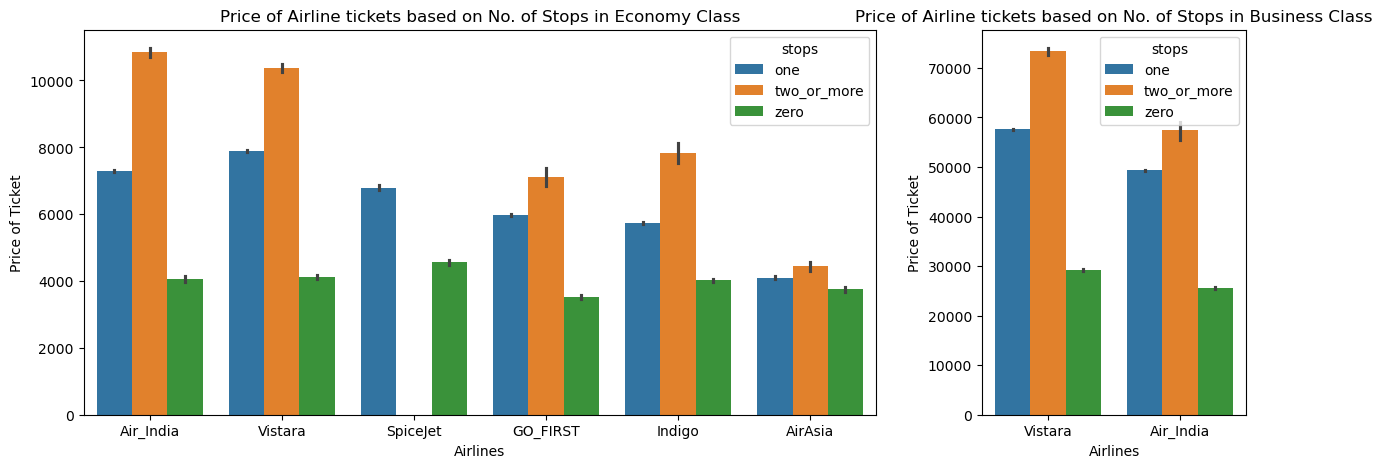

In [23]:
fig, axs=plt.subplots(1,2,gridspec_kw={'width_ratios':[3,1]},figsize=(15,5))
sns.barplot(y='price',x='airline',hue='stops',data=df.loc[df['class']=='Economy'].sort_values('price',ascending=False),ax=axs[0])
axs[0].set(xlabel='Airlines',ylabel='Price of Ticket',title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price',x='airline',hue='stops',data=df.loc[df['class']=='Business'].sort_values('price',ascending=False),ax=axs[1])
axs[1].set(xlabel='Airlines',ylabel='Price of Ticket',title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig,axs)